In [1]:
import ema as em
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'svg'

# Problem 3

In [2]:
mdl = em.rModel(2,3)
mdl.material('default', 1000)
mdl.xsection('default', 10000000, 50)
tsec = mdl.xsection('truss', 20, 1)

n1 = mdl.node('1', 0.0, 0.0)
n2 = mdl.node('2', 8.0, 0.0)
n3 = mdl.node('3', 16., 0.0)
n4 = mdl.node('4', 0.0, 6.0)

a = mdl.beam('a', n1, n2)
b = mdl.beam('b', n2, n3)
c = mdl.beam('c', n1, n4)

d = mdl.truss('d', n2, n4, xsec=tsec)

n2.p['y'] = -20

mdl.hinge(c, n4)

mdl.roller(n1)
mdl.fix(n3, ['x', 'y', 'rz'])
mdl.fix(n4, ['rz'])

# mdl.numDOF()
mdl.DOF = [[5, 6, 1], [5, 2, 3], [5, 7, 8], [4, 6, 9]] # Manually number DOFs

In [3]:
# em.utilities.export.FEDEAS(mdl)

In [4]:
mdl.nt

9

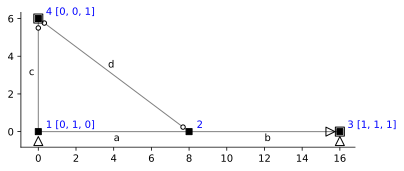

In [5]:
fig, ax = plt.subplots()
em.plot_structure(mdl, ax)

In [6]:
K = em.K_matrix(mdl)
K.f

,$1$,$2$,$3$,$4$
$P_{1}$,50000.000000,-4687.50,12500.0,4166.666667
$P_{2}$,-4687.500000,3063.75,0.0,960.000000
$P_{3}$,12500.000000,0.00,50000.0,0.000000
$P_{4}$,4166.666667,960.00,0.0,1974.444444


In [7]:
Uf = em.analysis.SolveDispl(mdl)
Uf

,$U_{{ff}}$
$1$,-0.002494
$2$,-0.014149
$3$,0.000624
$4$,0.012143


### Compatibility

In [8]:
A = em.A_matrix(mdl)
V = A.f@Uf
V

,$V_{{ff}}$
$a_1$,0.000000
$a_2$,-0.000726
$a_3$,0.002392
$b_1$,0.000000
$b_2$,-0.001145
$b_3$,-0.001769
$c_1$,0.000000
$c_2$,-0.000470
$c_3$,0.002024
$d_1$,-0.001225


In [9]:
mdl.redundant(b, '3')
mdl.redundant(d, '1')
B = em.B_matrix(mdl)

In [10]:
np.around(B.barx,5)

,0,1
0,0.0,0.0
1,0.0,-4.8
2,0.5,0.0
3,0.0,0.0
4,-0.5,-0.0
5,1.0,0.0
6,0.0,0.0
7,0.0,4.8
8,0.0,0.0
9,0.0,1.0


In [11]:
B.barx

,$b_3$,$d_1$
$a_1$,0.0,0.000000e+00
$a_2$,0.0,-4.800000e+00
$a_3$,0.5,2.220446e-16
$b_1$,0.0,0.000000e+00
$b_2$,-0.5,-2.220446e-16
$b_3$,1.0,0.000000e+00
$c_1$,0.0,0.000000e+00
$c_2$,0.0,4.800000e+00
$c_3$,0.0,0.000000e+00
$d_1$,0.0,1.000000e+00


In [12]:
ker = B.f.c.ker
np.around(ker,4)

,0,1,2,3,4
0,-0.1769,-0.1251,0.0,-0.7697,0.6005
1,0.1225,0.0866,0.0,-0.4461,-0.5176
2,-0.2357,0.3333,0.0,-0.0000,0.0000
3,0.7776,0.5499,0.0,-0.0316,0.3032
4,0.2357,-0.3333,0.0,0.0000,-0.0000
5,-0.4714,0.6667,0.0,0.0000,-0.0000
6,0.0000,0.0000,1.0,0.0000,0.0000
7,-0.1225,-0.0866,0.0,0.4461,0.5176
8,-0.0255,-0.0180,0.0,0.0929,0.1078


In [13]:
B.barx.T@V

,0
0,0.000000e+00
1,4.336809e-19


In [14]:
K.f@Uf

,$P_{{ff}}$
$P_{1}$,2.961450e-14
$P_{2}$,-2.000000e+01
$P_{3}$,9.728329e-15
$P_{4}$,-8.374101e-16


## Find element forces

In [15]:
Q = K.s@V
Q

,0
0,0.000000
1,11.761103
2,50.735069
3,0.000000
4,-50.735069
5,-58.529862
6,0.000000
7,-11.761103
8,0.000000
9,-2.450230


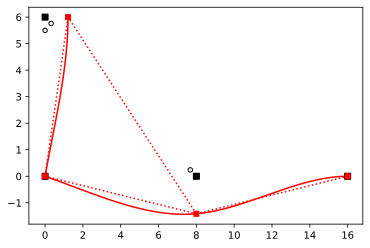

In [19]:
em.plot_U(mdl, Uf, ax, scale=100, chords=False)

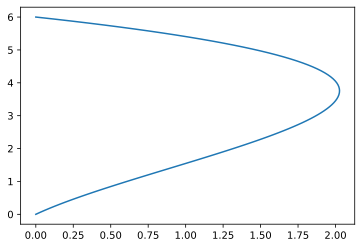

In [17]:
x = np.linspace(0, c.L, 100)
v_tags = [c.tag+'_2', c.tag+'_3']
v = [V.get(v_tags[0]),V.get(v_tags[1])]
y = c.Elastic_curve(x, v, scale=1000, global_coord=True)
plt.plot(y[0], y[1])


In [18]:
Uf.row_data

['1', '2', '3', '4']